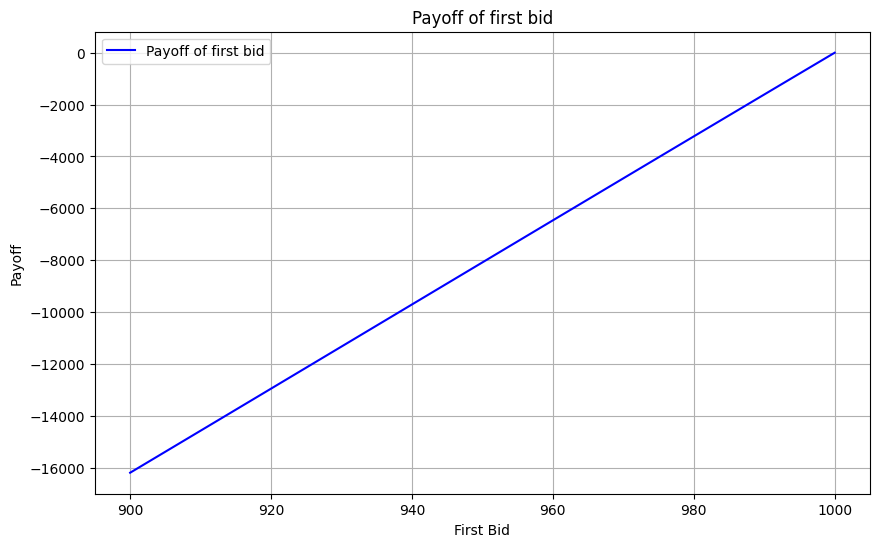

In [2]:
from sympy import lambdify
from sympy import symbols, integrate, solve
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

# Define the range of prices from 900 to 1000
prices = np.linspace(900, 1000, 101)

# Calculate the probability for each price using the linear probability distribution
# Since k = 1/5000 and probability scales linearly from least likely at 900 to most likely at 1000
probabilityBidEqualsAsk = (prices - 900) * (1/5000)

# Calculate the probability for each price using the linear probability distribution
# Since k = 1/5000 and probability scales linearly from least likely at 900 to most likely at 1000
probabilityBidGreaterThanAsk = ((prices ** 2)/10000) - ((9 * prices)/50)
probabilityBidGreaterThanAsk += probabilityBidGreaterThanAsk[0]

probabilityBidIsLessThanAsk = 1 - probabilityBidGreaterThanAsk

# Calculate the payoff for each bid in the range
payoff = (1000 - prices) * probabilityBidGreaterThanAsk

# Plotting the prices vs their probability
plt.figure(figsize=(10, 6))
plt.plot(prices, payoff, label='Payoff of first bid', color='blue')
plt.xlabel('First Bid')
plt.ylabel('Payoff')
plt.title('Payoff of first bid')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
firstBid = 956
secondBid = 980

maxPayoff = (0,0,0)
for firstBid in range(900, 1001):
    for secondBid in range(firstBid, 1001):

        # Define the interval
        start = 900
        stop = 1000

        # Number of samples
        n_samples = 100000

        # Create a linearly increasing probability density function (PDF) from 0 at start to 0.02 at stop
        # The PDF needs to be normalized so that its integral over the range equals 1.
        # The maximum value at 'stop' is 0.02, and the slope of the line connecting the start and stop is 0.02/(stop-start).
        slope = 0.02 / (stop - start)
        # To normalize the PDF, we find the area under the linear curve from start to stop and divide the function by this area.
        area = 0.5 * (stop - start) * 0.02
        normalized_slope = slope / area


        # Generate uniform samples from 0 to 1
        uniform_samples = np.random.uniform(0, 1, n_samples)

        # Transform the uniform samples to our desired distribution using the inverse of the CDF.
        # The CDF is obtained by integrating the PDF: CDF(x) = 0.5 * normalized_slope * (x - start)^2
        # Solving for x gives us the inverse CDF: x = sqrt((2 * CDF) / normalized_slope) + start
        # But first, we need to map our uniform samples to the CDF values that correspond to our PDF.
        # Since the area under our PDF from 'start' to 'stop' is normalized to 1, our uniform samples directly represent CDF values.
        samples = np.sqrt(2 * uniform_samples / normalized_slope) + start

# sample_900s = samples[samples <= 900]
# print(len(sample_900s))

# sample_1000s = samples[samples > 999]
# print(len(sample_1000s))

# counts, bins = np.histogram(samples)
# plt.figure(figsize=(10, 6))
# plt.stairs(counts, bins)

        results = []
        for sample in samples:
            if firstBid >= sample:
                results.append(1000 - firstBid)
                continue

            if secondBid >= sample:
                results.append(1000 - secondBid)
                continue

            results.append(0)
        
        avg_result = sum(results) / len(results)
        if avg_result > maxPayoff[0]:
            maxPayoff = (avg_result, firstBid, secondBid)
            print(maxPayoff)

print(maxPayoff)
# counts, bins = np.histogram(results)
# plt.figure(figsize=(10, 6))
# plt.stairs(counts, bins)

(0.00792, 900, 901)
(0.03822, 900, 902)
(0.09021, 900, 903)
(0.14784, 900, 904)
(0.24415, 900, 905)
(0.28858, 900, 906)
(0.4557, 900, 907)
(0.62008, 900, 908)
(0.7098, 900, 909)
(0.8892, 900, 910)
(1.11695, 900, 911)
(1.23464, 900, 912)
(1.44942, 900, 913)
(1.74494, 900, 914)
(1.89465, 900, 915)
(2.13612, 900, 916)
(2.34724, 900, 917)
(2.62482, 900, 918)
(2.85201, 900, 919)
(3.2056, 900, 920)
(3.45862, 900, 921)
(3.65586, 900, 922)
(4.02017, 900, 923)
(4.37684, 900, 924)
(4.72875, 900, 925)
(5.04976, 900, 926)
(5.29688, 900, 927)
(5.70456, 900, 928)
(5.90862, 900, 929)
(6.2958, 900, 930)
(6.56811, 900, 931)
(6.936, 900, 932)
(7.33114, 900, 933)
(7.60914, 900, 934)
(7.84615, 900, 935)
(8.30272, 900, 936)
(8.64108, 900, 937)
(8.98442, 900, 938)
(9.16098, 900, 939)
(9.5418, 900, 940)
(9.90492, 900, 941)
(10.1993, 900, 942)
(10.68123, 900, 943)
(10.93008, 900, 944)
(11.1683, 900, 945)
(11.43072, 900, 946)
(11.63721, 900, 947)
(11.9574, 900, 948)
(12.21399, 900, 949)
(12.4805, 900, 950)
(12

KeyboardInterrupt: 

12.9264


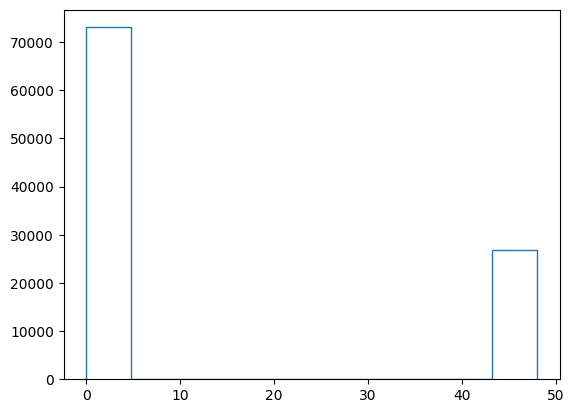

In [5]:
firstBid = 952
secondBid = 978

# Define the interval
start = 900
stop = 1000

# Number of samples
n_samples = 100000

# Create a linearly increasing probability density function (PDF) from 0 at start to 0.02 at stop
# The PDF needs to be normalized so that its integral over the range equals 1.
# The maximum value at 'stop' is 0.02, and the slope of the line connecting the start and stop is 0.02/(stop-start).
slope = 0.02 / (stop - start)
# To normalize the PDF, we find the area under the linear curve from start to stop and divide the function by this area.
area = 0.5 * (stop - start) * 0.02
normalized_slope = slope / area


# Generate uniform samples from 0 to 1
uniform_samples = np.random.uniform(0, 1, n_samples)

# Transform the uniform samples to our desired distribution using the inverse of the CDF.
# The CDF is obtained by integrating the PDF: CDF(x) = 0.5 * normalized_slope * (x - start)^2
# Solving for x gives us the inverse CDF: x = sqrt((2 * CDF) / normalized_slope) + start
# But first, we need to map our uniform samples to the CDF values that correspond to our PDF.
# Since the area under our PDF from 'start' to 'stop' is normalized to 1, our uniform samples directly represent CDF values.
samples = np.sqrt(2 * uniform_samples / normalized_slope) + start


results = []
for sample in samples:
    if firstBid >= sample:
        results.append(1000 - firstBid)
        continue

    results.append(0)

print(sum(results) / len(results))
counts, bins = np.histogram(results)
plt.stairs(counts, bins)